# LlamaParse - Parsing comic books with parsing intructions
Parsing intructions allow you to instruct our parsing model the same way you would instruct an LLM!

They can be usefull to help the parser get better results on complex document layouts, to extract data in a specific format, or to transform the document in other ways.

Using Parsing Instruction you will get better results out of LlamaParse on complicated documents, and also be able to simplify your application code.

## Installation

Parsing instructions are part of the llamaParse API. They can be accessed by directly specifying the parsing_instruction parameter in the API or by using the LlamaParse python module (which we will use for this tutorial).

To install llama-parse, just get it from PIP:

In [ ]:
%pip install llama-parse -q

## API key

The use of LlamaParse requires an API key which you can get here: https://cloud.llamaindex.ai/parse

In [ ]:
# import os
# os.environ["LLAMA_CLOUD_API_KEY"] = "llx-..."

## Async (Notebook only)
llama-parse is async-first, so running the code in a notebook requires the use of nest_asyncio


In [ ]:
import nest_asyncio

nest_asyncio.apply()

## Import the package

In [ ]:
from llama_parse import LlamaParse

## Using llamaparse for getting better results (on Manga!)

Sometimes the layout of a page is unusual and you will get sub-optimal reading order results with LlamaParse. For example, when parsing manga you expect the reading order to be right to left even if the content is in English!

Let's download an extract of a great manga "The manga guide to calculus", by Hiroyuki Kojima (https://www.amazon.com/Manga-Guide-Calculus-Hiroyuki-Kojima/dp/1593271948)



In [ ]:
!mkdir manga
!wget "https://drive.usercontent.google.com/uc?id=1tZJhcpepLRdQFJFCFX50QIqLyLgqzZsY&export=download" -O ./manga/manga.pdf

### Without parsing instructions
For the sake of comparison, let's first parse without any instructions.

In [ ]:
vanilaParsing = LlamaParse(result_type="markdown").load_data("./manga/manga.pdf")

As you can see below, LlamaParse is not doing a great job here. It is interpreting the grid of comic panels as a table, and trying to fit the dialogue into a table. It's very hard to follow.

In [ ]:
with open("./mds/parsed.md", "w") as f:
    f.write(vanilaParsing[0].text)

**Vanilla Parsed**

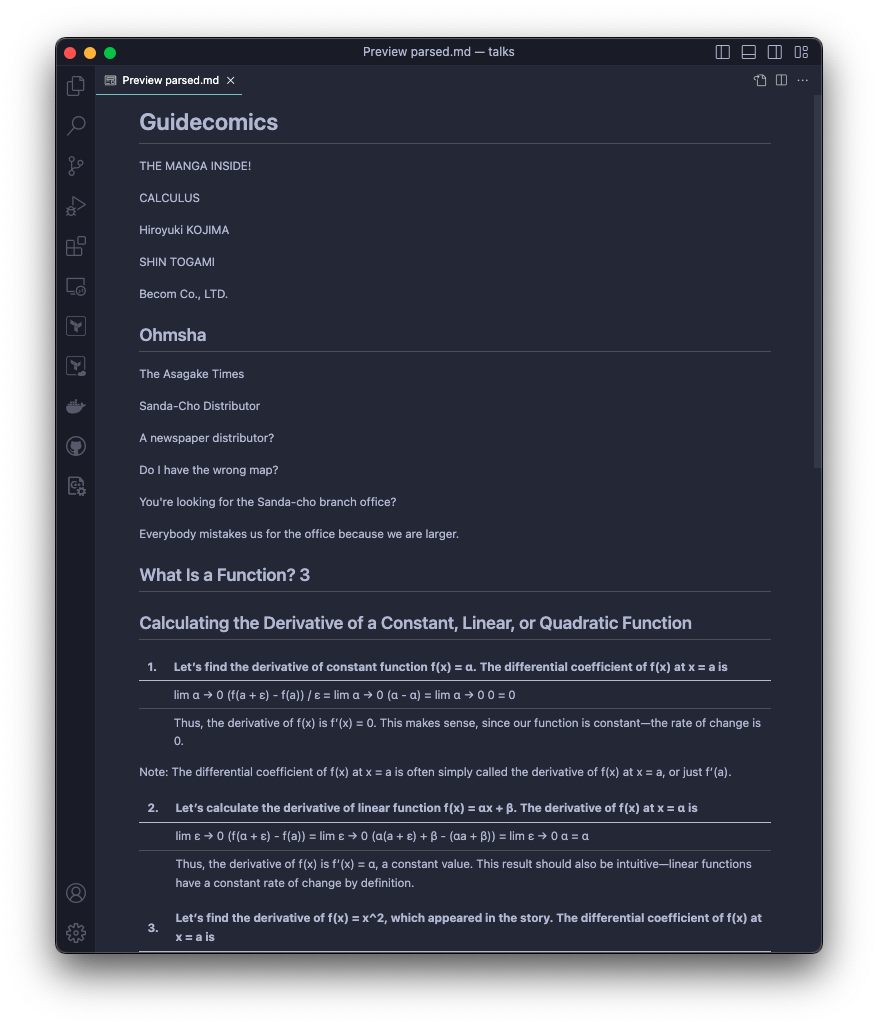

### Using parsing instructions
Let's try to parse the manga with custom instructions:

"The provided document is a manga comic book. Most pages do NOT have title. It does not contain tables. Try to reconstruct the dialogue happening in a cohesive way."

To do so just pass the parsing instruction as a parameter to LlamaParse:

In [ ]:
parsingInstructionManga = (
    "The provided document is a manga comic book, most pages do NOT have title. "
    "It does not contain tables. Try to reconstruct the dialog happening in a cohesive way."
)
withInstructionParsing = LlamaParse(
    result_type="markdown",
    parsing_instruction=parsingInstructionManga
).load_data("./manga/manga.pdf")

**Instruction Parsed**

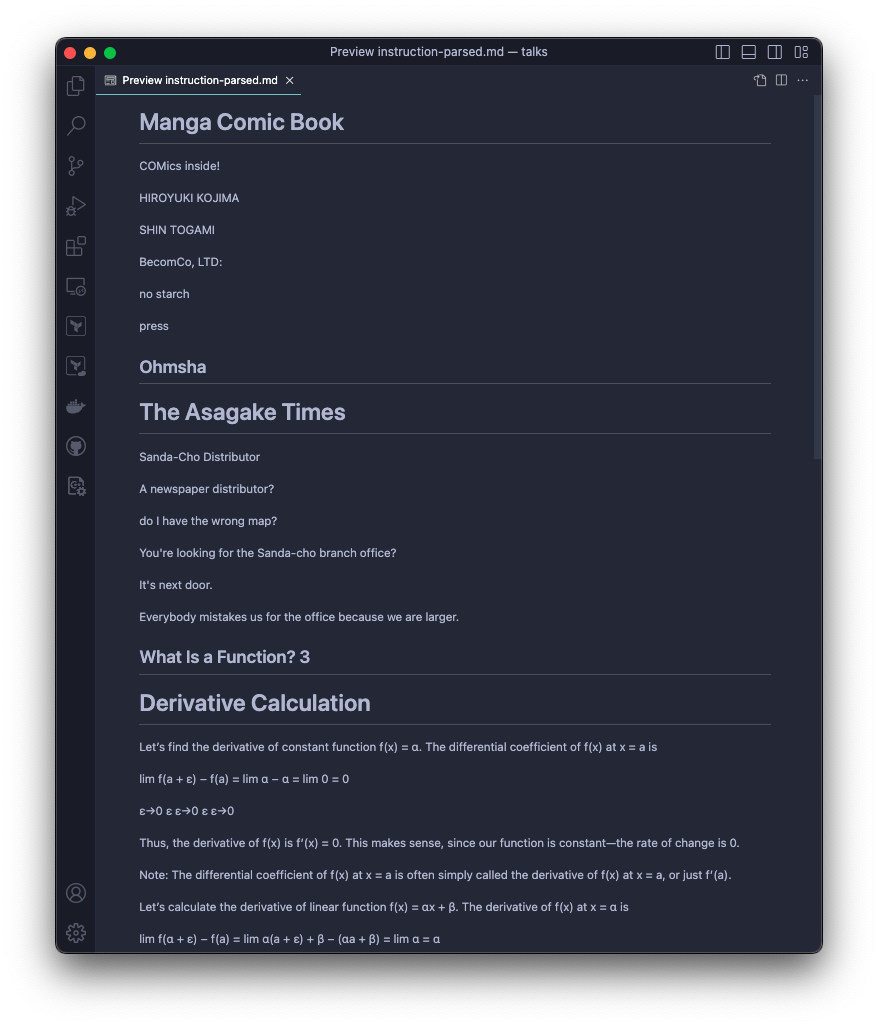

Let's see how it compare with page 3! We encourage you to play with the target page and explore other pages. As you will see, the parsing instruction allowed LlamaParse to make sense of the document!

<img src="https://drive.usercontent.google.com/download?id=1M87rXTIZE8d5v7aHmVZVW6gW3eDGq6ks&authuser=0" />

In [ ]:
with open("./mds/instruction-parsed.md", "w") as f:
    f.write(withInstructionParsing[0].text)

In [ ]:
target_page=1
print(vanilaParsing[0].text.split('\n---\n')[target_page])
print("\n\n------------------------------------------------------------\n\n")
print(withInstructionParsing[0].text.split('\n---\n')[target_page])

### Math - doing more with parsing instuction!

But this manga is about math and full of equations, why not ask the parser to output them in **LaTeX**?

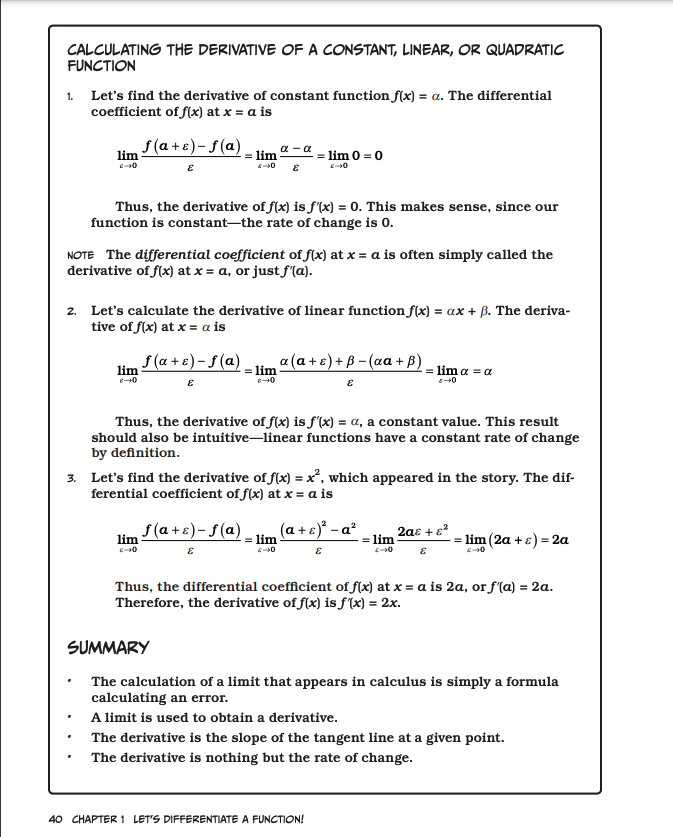

In [ ]:
parsingInstructionMangaLatex = (
    "The provided document is a manga comic book, most page do NOT have title. "
    "It does not contain table. Do not output table. "
    "Try to reconstruct the dialog happening in a cohesive way."
    "Output any math equation in LATEX markdown that are enclosed between $$. "
    "For example: f(x) = x should be turned into $$f(x) = x$$."
)

withLatex = LlamaParse(result_type="markdown", parsing_instruction=parsingInstructionMangaLatex).load_data("./manga/manga.pdf")

In [ ]:
with open("./mds/latex-instruction-parsed.md", "w") as f:
    f.write(withInstructionParsing[0].text)

In [ ]:
target_page=2
print("\n\n[Without instruction]------------------------------------------------------------\n\n")
print(vanilaParsing[0].text.split('\n---\n')[target_page])
print("\n\n[With instruction to output math in LATEX!]------------------------------------------------------------\n\n")
print(withLatex[0].text.split('\n---\n')[target_page])


And here is the result as rendered by https://upmath.me/ .

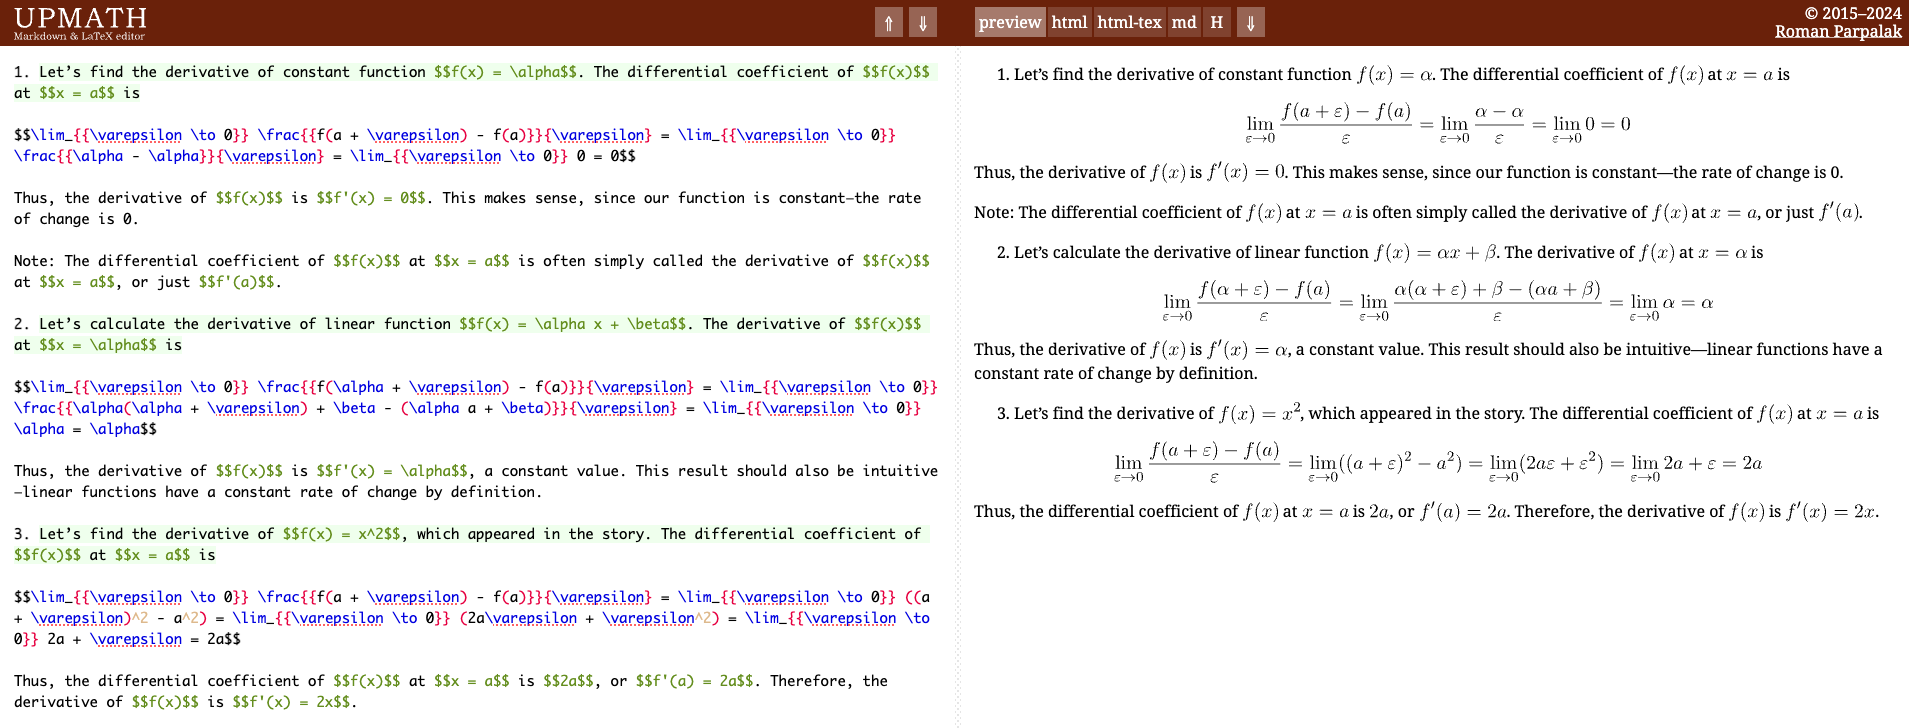

Over this short notebook we saw how to use parsing instructions to increase the quality and accuracy of parsing with LLamaParse!